In [1]:
from uproot_io import Events, View
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt

interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction

In [27]:
def plot_event(filename,num_event):
    events = Events(filename)
    hits_x=np.array([])
    hits=np.array([])
    hits_adcs=np.array([])

    events.event_number[num_event]
    idx = np.where(events.event_number == num_event)
    for j in idx:
        for i in range(np.size(events.reco_hits_w[j])):
            hits = np.append(hits, events.reco_hits_w[j][i])
            hits_x = np.append(hits_x, events.reco_hits_x_w[j][i])
            hits_adcs = np.append(hits_adcs, events.reco_adcs_w[j][i])
    
    hits_vtx_x=events.neutrino_vtx_x[num_event]
    hits_vtx_w=events.neutrino_vtx_w[num_event]
    
    print(interaction_dictionary[events.interaction_type[idx][0]])
    
    plt.scatter(hits,hits_x,s=8,c=hits_adcs,cmap='hot')
    plt.scatter(hits_vtx_w,hits_vtx_x,s=20,c='blue')
    
    plt.colorbar()

In [25]:
#plot_event("projects\CheatedRecoFile_1.root",0)
# >15 hits, purity>0.8, completeness>0.8


CCDIS_MU_P_P_P_P_PIZERO


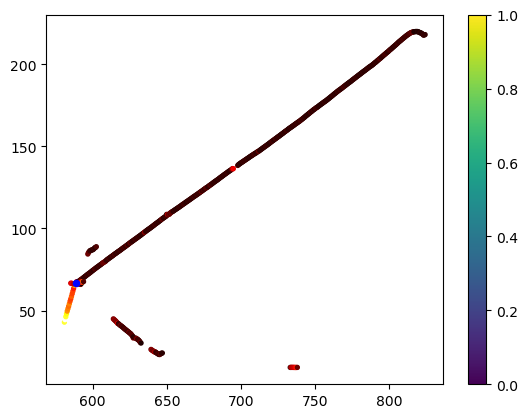

In [28]:
plot_event("projects\PandoraRecoFile_1.root",0)